In [ ]:
#!pip install --upgrade keras

In [ ]:
#pip install tensorflow

In [ ]:
# Utility
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_Data/training.1600000.processed.noemoticon.csv',encoding='latin-1', names = ['polarity', 'id', 'date', 'query', 'user', 'text'])
data = data.sample(frac = 1)
data_copy_1 = data[:200000]

In [ ]:
data_copy_1.head()

,polarity,id,date,query,user,text
933420,4,1791857572,Wed May 13 21:19:30 PDT 2009,NO_QUERY,whitneyannabel,and we now have all of freaks and geeks
1181153,4,1982034580,Sun May 31 10:23:41 PDT 2009,NO_QUERY,hotnizz,JUNE!!!! Halftime yo!!! How's your year so far?
321390,0,2003724262,Tue Jun 02 07:02:26 PDT 2009,NO_QUERY,jeffg333,I really need a 24-70 f 2.8 lens I have a 24-1...
1067794,4,1965564608,Fri May 29 16:08:37 PDT 2009,NO_QUERY,the_fonz,@cfstinabug Thanks babe!
199160,0,1971371956,Sat May 30 06:57:04 PDT 2009,NO_QUERY,elltotheoh,i need a desk that doesn't require me to perch...


In [ ]:
data_copy_1.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [ ]:
type(data_copy_1['polarity'])

pandas.core.series.Series

In [ ]:
print(data_copy_1.shape)

(200000, 6)


In [ ]:
data_copy_1['polarity'].unique()

array([4, 0])

In [ ]:
data_copy_1['polarity'] = data_copy_1['polarity'].replace(4,1)

In [ ]:
data.head(10)

,polarity,id,date,query,user,text
933420,4,1791857572,Wed May 13 21:19:30 PDT 2009,NO_QUERY,whitneyannabel,and we now have all of freaks and geeks
1181153,4,1982034580,Sun May 31 10:23:41 PDT 2009,NO_QUERY,hotnizz,JUNE!!!! Halftime yo!!! How's your year so far?
321390,0,2003724262,Tue Jun 02 07:02:26 PDT 2009,NO_QUERY,jeffg333,I really need a 24-70 f 2.8 lens I have a 24-1...
1067794,4,1965564608,Fri May 29 16:08:37 PDT 2009,NO_QUERY,the_fonz,@cfstinabug Thanks babe!
199160,0,1971371956,Sat May 30 06:57:04 PDT 2009,NO_QUERY,elltotheoh,i need a desk that doesn't require me to perch...
563654,0,2205982339,Wed Jun 17 05:48:05 PDT 2009,NO_QUERY,Tedders85,@bitmapped me too! BUT I have to wait to go h...
1257393,4,1997695817,Mon Jun 01 17:17:55 PDT 2009,NO_QUERY,Angel0886,New glasses and new hair http://i28.photobuck...
491324,0,2183787784,Mon Jun 15 14:59:14 PDT 2009,NO_QUERY,June50a,sooo tired!! and we're nowhere near finished f...
509110,0,2189327872,Mon Jun 15 23:47:00 PDT 2009,NO_QUERY,kassieohhh,@siobhanyy that was so wrong when he said &quo...
1239226,4,1993478007,Mon Jun 01 10:26:31 PDT 2009,NO_QUERY,NathalyCh,http://twitpic.com/6et8v - my wallpaper on twi...


In [ ]:
data_copy_1.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.500355,1.998853e+09
std,0.500001,1.936196e+08
min,0.000000,1.467811e+09
25%,0.000000,1.956887e+09
50%,1.000000,2.002074e+09
75%,1.000000,2.177050e+09
max,1.000000,2.329205e+09


In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data_copy_1['polarity'][data.polarity == 1]
negatives = data_copy_1['polarity'][data.polarity == 0]

print(f'Toatal length of the data is: {data_copy_1.shape[0]}')
print(f'No. of positve tagged sentences is: {len(positives)}')
print(f'No. of negative tagged sentences is: {len(negatives)}')


Toatal length of the data is: 200000
No. of positve tagged sentences is: 0
No. of negative tagged sentences is: 99929


In [ ]:
#get a word count per of text
def word_count(words):
    return len(words.split())

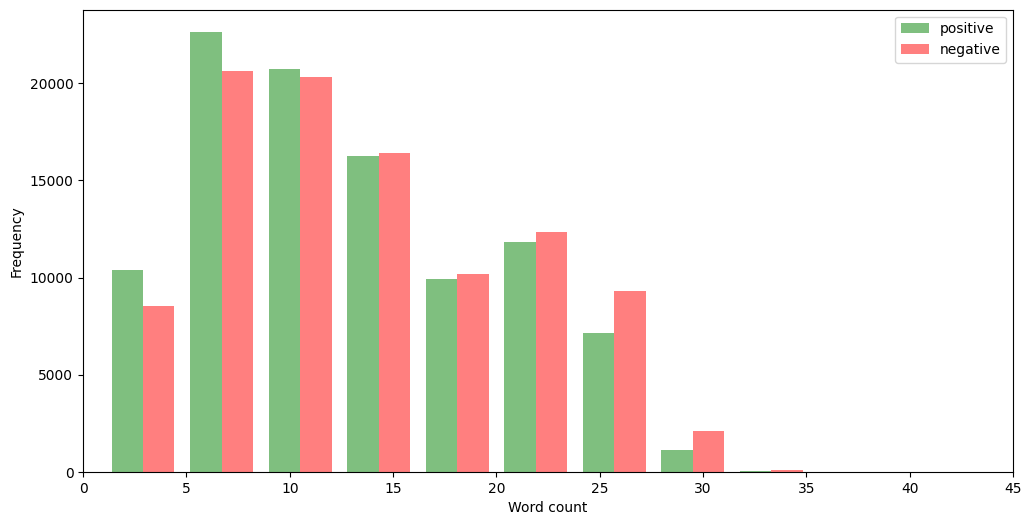

In [ ]:
# plot word count distribution for both positive and negative

data_copy_1['word count'] = data_copy_1['text'].apply(word_count)
p = data_copy_1['word count'][data_copy_1.polarity == 1]
n = data_copy_1['word count'][data_copy_1.polarity == 0]

plt.figure(figsize = (12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p,n], color = ['g', 'r'], alpha = 0.5, label = ['positive', 'negative'])
plt.legend(loc = 'upper right')


In [ ]:
data_copy_1.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text', 'word count'], dtype='object')

In [ ]:
# get common words in training dataset

from collections import Counter
all_words = []
for line in list(data_copy_1['text']):
    words = line.split()
    for word in words:
        if(len(word)>2):
            all_words.append(word.lower())

Counter(all_words).most_common(30)

[('the', 65123),
 ('and', 36868),
 ('you', 29756),
 ('for', 26879),
 ('have', 17902),
 ('that', 15979),
 ("i'm", 15914),
 ('just', 15632),
 ('but', 15489),
 ('with', 14150),
 ('was', 12796),
 ('not', 12771),
 ('this', 10961),
 ('get', 10193),
 ('are', 9673),
 ('like', 9599),
 ('good', 9575),
 ('all', 9142),
 ('out', 8602),
 ("it's", 8088),
 ('your', 8069),
 ('now', 7894),
 ('going', 7837),
 ('got', 7614),
 ('love', 7549),
 ('day', 7486),
 ('from', 7110),
 ('will', 6259),
 ('back', 6241),
 ('what', 6115)]

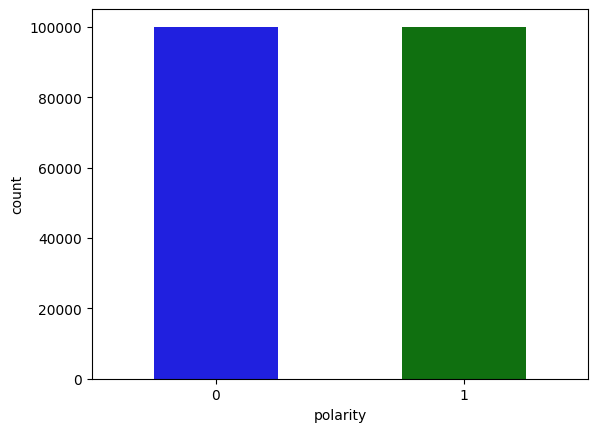

In [ ]:
sns.countplot(x='polarity',data = data_copy_1,width = 0.5, palette = ["b","g"])
plt.show()

In [ ]:
# Removing the unnecessary columns.
data_copy_1.drop(['date', 'query', 'user', 'word count'], axis=1, inplace = True)

In [ ]:
data.head()

,polarity,id,date,query,user,text
933420,4,1791857572,Wed May 13 21:19:30 PDT 2009,NO_QUERY,whitneyannabel,and we now have all of freaks and geeks
1181153,4,1982034580,Sun May 31 10:23:41 PDT 2009,NO_QUERY,hotnizz,JUNE!!!! Halftime yo!!! How's your year so far?
321390,0,2003724262,Tue Jun 02 07:02:26 PDT 2009,NO_QUERY,jeffg333,I really need a 24-70 f 2.8 lens I have a 24-1...
1067794,4,1965564608,Fri May 29 16:08:37 PDT 2009,NO_QUERY,the_fonz,@cfstinabug Thanks babe!
199160,0,1971371956,Sat May 30 06:57:04 PDT 2009,NO_QUERY,elltotheoh,i need a desk that doesn't require me to perch...


In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.tail(10)

,polarity,date,query,user,text
380985,0,Sat Jun 06 01:37:16 PDT 2009,NO_QUERY,sassyback,"@highandrandom The one with Fry's dog? If so, ..."
1554893,4,Mon Jun 15 16:43:22 PDT 2009,NO_QUERY,bemy_zombiehero,THERE'S MAD YELLING GOING DOWN ON FACEBOOK.
57039,0,Sun May 03 00:57:59 PDT 2009,NO_QUERY,FashnsSwthrt,OMG now I cant sleep! Wts
502000,0,Mon Jun 15 20:12:05 PDT 2009,NO_QUERY,lnventlve,Time for sleep!! 320 Mile drive in the morning
483860,0,Mon Jun 15 10:36:53 PDT 2009,NO_QUERY,MagicalMillie,"Shut up, stomach!"
1059085,4,Fri May 29 12:11:43 PDT 2009,NO_QUERY,dc3plusme,@gotlove4dc3 followin u now
1121175,4,Sat May 30 12:24:45 PDT 2009,NO_QUERY,StephT48,spending the day with mummy... she's got soup ...
1000483,4,Thu May 21 23:46:38 PDT 2009,NO_QUERY,ionutbunescu,@Cricketa normal c? i-a pl?cut doar... eu sun...
769410,0,Tue Jun 23 15:22:34 PDT 2009,NO_QUERY,razsolo,Oh god someone farted on the train...why don't...
42210,0,Fri May 01 20:50:15 PDT 2009,NO_QUERY,CarlyAn,@GhostTown_


In [ ]:
#Checking if any null values is present or not
(data_copy_1.isnull().sum() / len(data_copy_1))*100

polarity    0.0
id          0.0
text        0.0
dtype: float64

In [ ]:
#Converting pandas object to a string type
data_copy_1['text'] = data_copy_1['text'].astype('str')

In [ ]:
type(data_copy_1['text'])

pandas.core.series.Series

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)


{'under', 'that', 'in', 'as', 'through', 'll', 'won', 'we', 'few', 'yours', 'she', 'couldn', 'an', 'shan', "doesn't", "couldn't", 'mustn', 'a', 'to', 'didn', "you're", 'o', 'mightn', 'and', 'own', 'what', 'will', 'hasn', 'above', 'd', "you'd", 'are', 'not', 'who', 'off', 'during', "mustn't", 'how', 've', 'had', 're', 'can', 'shouldn', 'once', 'by', 'weren', 'at', 'been', 'each', 'doesn', "didn't", "needn't", 'only', 'you', 'them', 'when', 'no', 'now', 'their', "hasn't", 'was', 'if', "won't", 'do', 'nor', 'over', 'hadn', 'its', 'he', 'hers', 'down', 'again', 'same', 'they', "mightn't", 'am', 'aren', 'his', 'there', 'out', 'into', 'those', "wasn't", 'isn', 'on', "that'll", 'such', 'these', 'i', 'all', 'until', "haven't", 'any', 'up', 'here', 'm', 'being', 'very', 'ourselves', 'does', 'yourselves', 'your', 'for', 'the', 'haven', "hadn't", 'have', 'just', 'between', 'is', 'both', 'himself', 'some', 'itself', "shouldn't", 'her', "you've", 'why', 'myself', 'but', 'from', 'this', 'needn', 'th

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
data_copy_1['processed_tweets'] = data_copy_1['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
data.tail(10)

,polarity,date,query,user,text
380985,0,Sat Jun 06 01:37:16 PDT 2009,NO_QUERY,sassyback,"@highandrandom The one with Fry's dog? If so, ..."
1554893,4,Mon Jun 15 16:43:22 PDT 2009,NO_QUERY,bemy_zombiehero,THERE'S MAD YELLING GOING DOWN ON FACEBOOK.
57039,0,Sun May 03 00:57:59 PDT 2009,NO_QUERY,FashnsSwthrt,OMG now I cant sleep! Wts
502000,0,Mon Jun 15 20:12:05 PDT 2009,NO_QUERY,lnventlve,Time for sleep!! 320 Mile drive in the morning
483860,0,Mon Jun 15 10:36:53 PDT 2009,NO_QUERY,MagicalMillie,"Shut up, stomach!"
1059085,4,Fri May 29 12:11:43 PDT 2009,NO_QUERY,dc3plusme,@gotlove4dc3 followin u now
1121175,4,Sat May 30 12:24:45 PDT 2009,NO_QUERY,StephT48,spending the day with mummy... she's got soup ...
1000483,4,Thu May 21 23:46:38 PDT 2009,NO_QUERY,ionutbunescu,@Cricketa normal c? i-a pl?cut doar... eu sun...
769410,0,Tue Jun 23 15:22:34 PDT 2009,NO_QUERY,razsolo,Oh god someone farted on the train...why don't...
42210,0,Fri May 01 20:50:15 PDT 2009,NO_QUERY,CarlyAn,@GhostTown_


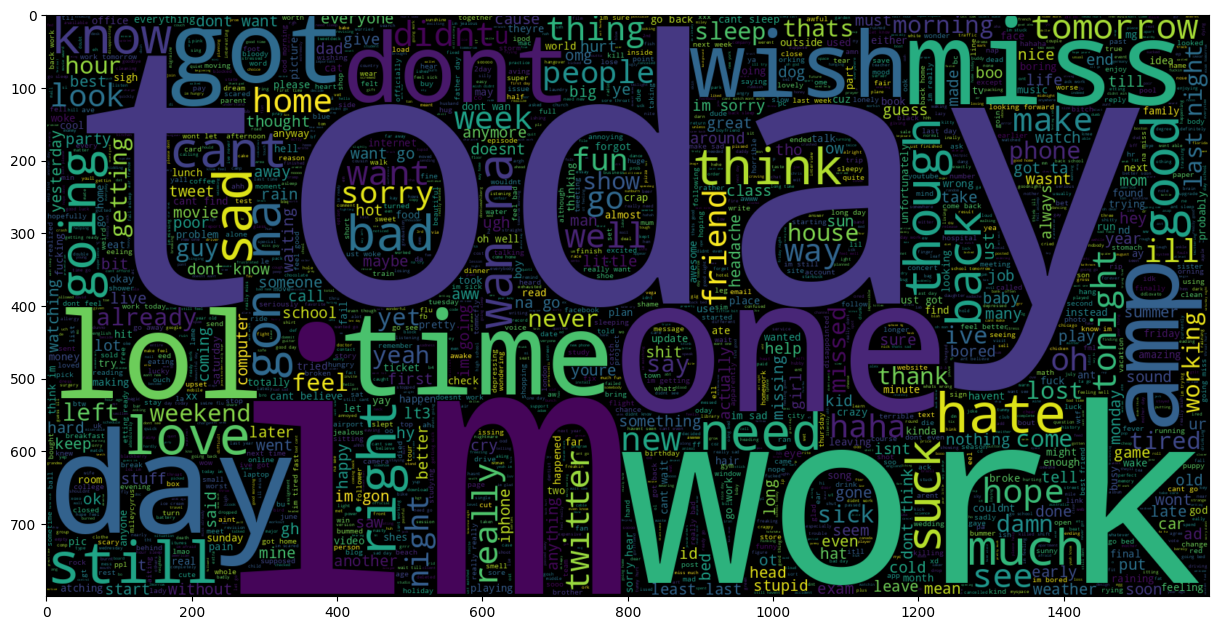

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_copy_1[data_copy_1.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

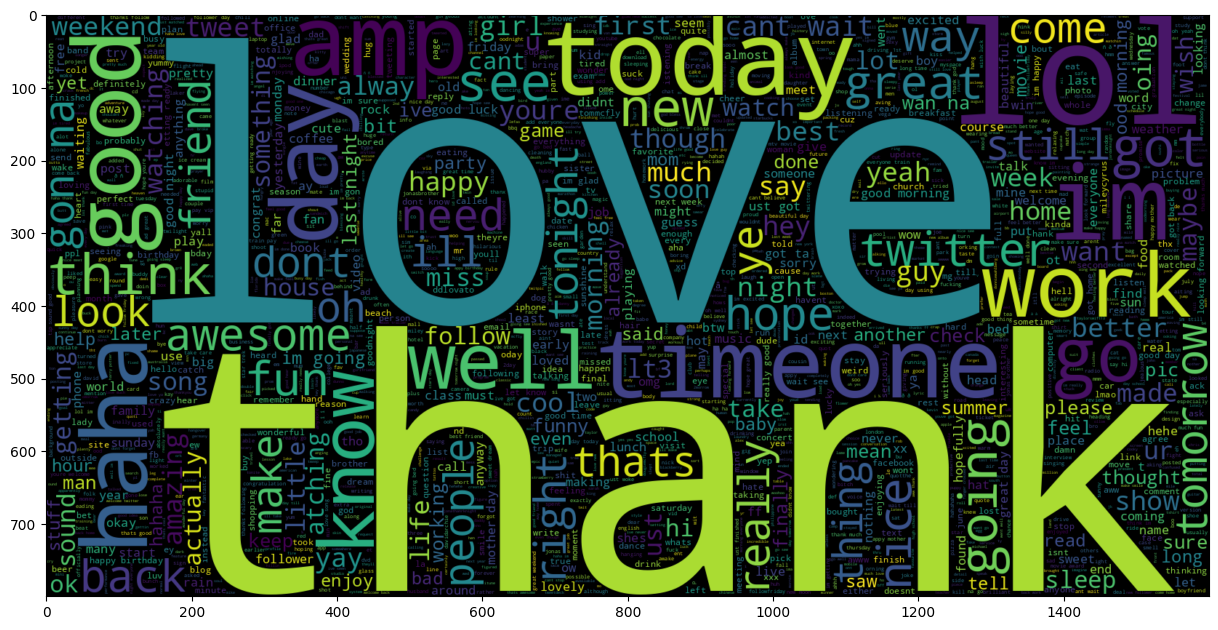

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_copy_1[data_copy_1.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X = data_copy_1['processed_tweets'].values
y = data_copy_1['polarity'].values

In [ ]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
# print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.


In [ ]:
print(X.shape)
print(y.shape)

(200000, 170713)
(200000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170713)
y_train (160000,)

X_test (40000, 170713)
y_test (40000,)


In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Accuracy of model on training data : 83.431875
Accuracy of model on testing data : 77.365 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     19977
           1       0.76      0.80      0.78     20023

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



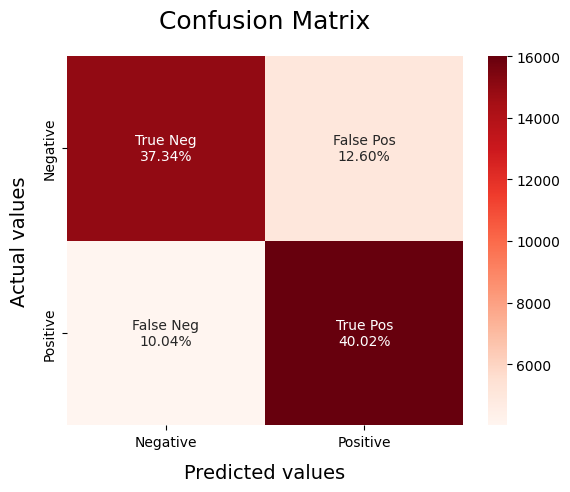

In [ ]:
lr = LogisticRegression()
history=lr.fit(X_train, y_train)
model_Evaluate(lr)

Accuracy of model on training data : 93.07375
Accuracy of model on testing data : 76.465 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     19977
           1       0.75      0.79      0.77     20023

    accuracy                           0.76     40000
   macro avg       0.77      0.76      0.76     40000
weighted avg       0.77      0.76      0.76     40000



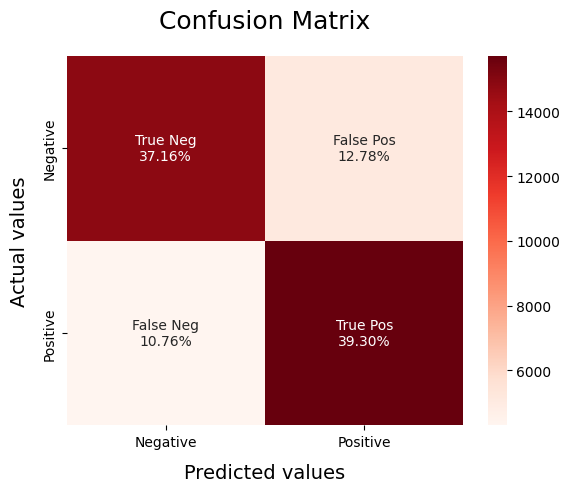

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

In [ ]:
# rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
# rf.fit(X_train, y_train)
# model_Evaluate(rf)

Accuracy of model on training data : 86.7725
Accuracy of model on testing data : 75.9875 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     19977
           1       0.77      0.74      0.76     20023

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



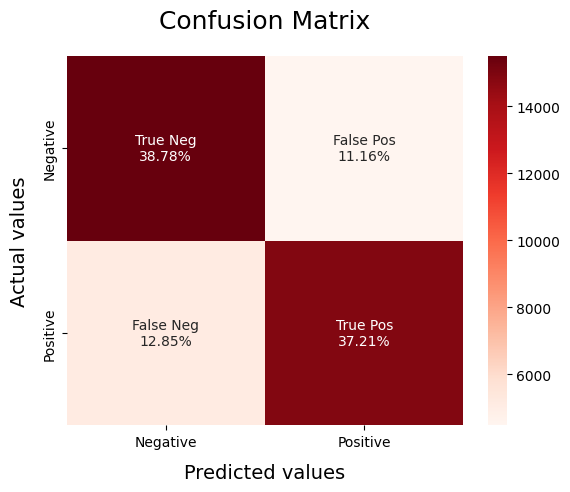

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(160000, 170713)
(40000, 170713)


In [ ]:
# !pip install --upgrade keras

In [ ]:
# pip install tensorflow


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_copy_1.processed_tweets)
sequences = tokenizer.texts_to_sequences(data_copy_1.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  411 2488 2150]
 [   0    0    0 ...  643   97  248]
 [   0    0    0 ... 3020  317  134]
 ...
 [   0    0    0 ...    0  219 1049]
 [   0    0    0 ...  669  508   88]
 [   0    0    0 ...    0    0    0]]


In [ ]:
# from sklearn.preprocessing import MaxAbsScaler
# mmscaler = MaxAbsScaler()
# tweets = mmscaler.fit_transform(tweets)
# print(tweets)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data_copy_1.polarity.values, test_size=0.2, random_state=101)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
5000/5000 [==============================] - ETA: 0s - loss: 0.5095 - accuracy: 0.7467
Epoch 1: val_accuracy improved from -inf to 0.76807, saving model to rnn_model.hdf5
5000/5000 [==============================] - 784s 156ms/step - loss: 0.5095 - accuracy: 0.7467 - val_loss: 0.4759 - val_accuracy: 0.7681
Epoch 2/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.7739
Epoch 2: val_accuracy improved from 0.76807 to 0.77108, saving model to rnn_model.hdf5
5000/5000 [==============================] - 813s 163ms/step - loss: 0.4682 - accuracy: 0.7739 - val_loss: 0.4731 - val_accuracy: 0.7711
Epoch 3/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4517 - accuracy: 0.7829
Epoch 3: val_accuracy improved from 0.77108 to 0.77350, saving model to rnn_model.hdf5
5000/5000 [==============================] - 820s 164ms/step - loss: 0.4517 - accuracy: 0.7829 - val_loss: 0.4722 - val_accuracy: 0.7735
Epoch 4/10
5000/5000 [===============

In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, Bidirectional, LSTM, Dense
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# import tensorflow as tf

# # Define the model
# model2 = Sequential()
# model2.add(Embedding(max_words, 128))
# model2.add(Bidirectional(LSTM(64)))
# model2.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Define callbacks
# checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_weights_only=False)
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model
# history = model2.fit(X_train, y_train, epochs=10, batch_size=250, validation_data=(X_test, y_test), callbacks=[checkpoint2, early_stopping])

In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 1s 591ms/step
Negative


In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 0s 33ms/step
Negative


In [ ]:
sequence = tokenizer.texts_to_sequences(['it is a bad day for work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 53ms/step
Negative


In [ ]:
import pickle

file = open('logisticRegression.pickle','wb')
pickle.dump(lr, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()